In [1]:
%matplotlib inline

from __future__ import absolute_import, print_function, unicode_literals, division
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import random as rand
import copy

In [2]:
DATA_PATH = '~/data'
mnist = fetch_mldata('MNIST original', data_home=DATA_PATH)
print(mnist.data.shape)

(70000, 784)


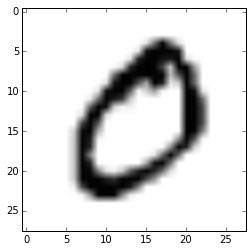

In [3]:
data_array = mnist.data
plt.imshow(data_array[0].reshape(28, 28), cmap = 'Greys')
plt.show()

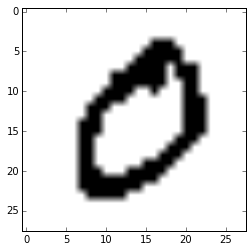

In [4]:
#Convert image to binary matrix
for img in data_array:
    img[img < 100] = 0
    img[img > 0] = 1

plt.imshow(data_array[0].reshape(28, 28), cmap = 'Greys')
plt.show()

In [5]:
class RBM(object):
    """
    Implementation of Restricted Boltzmann Machine for binary prediction
    
    Inputs:
    Data
    Number of hidden and visible states
    Learning rate, default set to 0.1
    
    Outputs:
    Weight matrix
    Epoch number and error
    """

    def __init__(self, data, num_visible, num_hidden, num_epochs, learning_rate=0.1):
        
        self.data = data
        self.num_data = data.shape[0]
        self.num_hidden = num_hidden
        self.num_visible = num_visible
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # weight matrix first row and first column represent the bias
        self.weights = np.random.rand(self.num_visible, self.num_hidden) 
        self.weights = np.insert(self.weights, 0, 0, axis = 0)
        self.weights = np.insert(self.weights, 0, 0, axis = 1)
    
    def _sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def _gen_prob(self,a,b):
        return self._sigmoid(np.dot(a,b))
    
    def _gen_assoc(self,a):
        probs = self._gen_prob(a,self.weights)
        return np.dot(a.T,probs)

    def CDk(self):
        max_epochs = self.num_epochs + 1
        self.data = np.insert(self.data, 0, 1, axis=1)
        
        for epoch in xrange(0, max_epochs):
            up_probs = self._gen_prob(self.data,self.weights)
            up_associations = self._gen_assoc(self.data)
            up_states = up_probs > np.random.rand(self.num_data, self.num_hidden + 1)
            
            down_probs = self._gen_prob(up_states,self.weights.T)
            down_probs[:,0] = 1 
            down_associations = self._gen_assoc(down_probs)
            
            self.weights += self.learning_rate * \
                ((up_associations - down_associations)/self.num_data)
                
            error = np.sum((self.data - down_probs) ** 2)
            print("Epoch: ", epoch, ", Error: ", error)
            if epoch == self.num_epochs:
                return down_probs
   

In [6]:
visible_units = data_array.shape[1]
epochs = 10
hidden_layers = 300
learning_rate = 0.4

r = RBM(data_array, visible_units, hidden_layers, epochs, learning_rate)
sample = r.CDk()
print(r.weights)

Epoch:  0 , Error:  47051393.0
Epoch:  1 , Error:  47051392.9884
Epoch:  2 , Error:  7296826.38823
[[  3.21455261e-04  -2.09641170e-01  -8.39480619e-02 ...,  -1.08796947e-01
   -1.49528274e-01  -8.50002400e-02]
 [ -2.00000000e-01  -4.69817865e-01  -5.20688756e-01 ...,  -6.89937626e-03
    1.60724062e-02  -2.29896490e-01]
 [ -2.00000000e-01  -6.57129244e-01  -1.49928772e-01 ...,  -6.43390555e-01
   -4.59986888e-01   1.74891728e-01]
 ..., 
 [ -2.00000000e-01  -7.68720667e-02  -1.89297666e-01 ...,   4.60888707e-02
   -6.75076455e-01  -1.30616582e-01]
 [ -2.00000000e-01  -1.81010280e-01  -2.84001719e-01 ...,   1.54453775e-01
   -1.92701890e-01   1.20976648e-01]
 [ -2.00000000e-01   5.71896329e-02  -3.54479277e-01 ...,  -3.14982577e-01
   -2.82981692e-01  -3.56387281e-01]]


(785, 301)


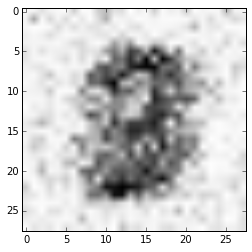

In [7]:
print(r.weights.shape)
plt.imshow(sample[11][1:].reshape(28,28), cmap = 'Greys')
plt.show()
#print(sample[11][1:].reshape(28,28))

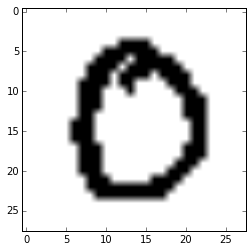

In [15]:
plt.imshow(data_array[11].reshape(28,28), cmap = 'Greys')
plt.show()

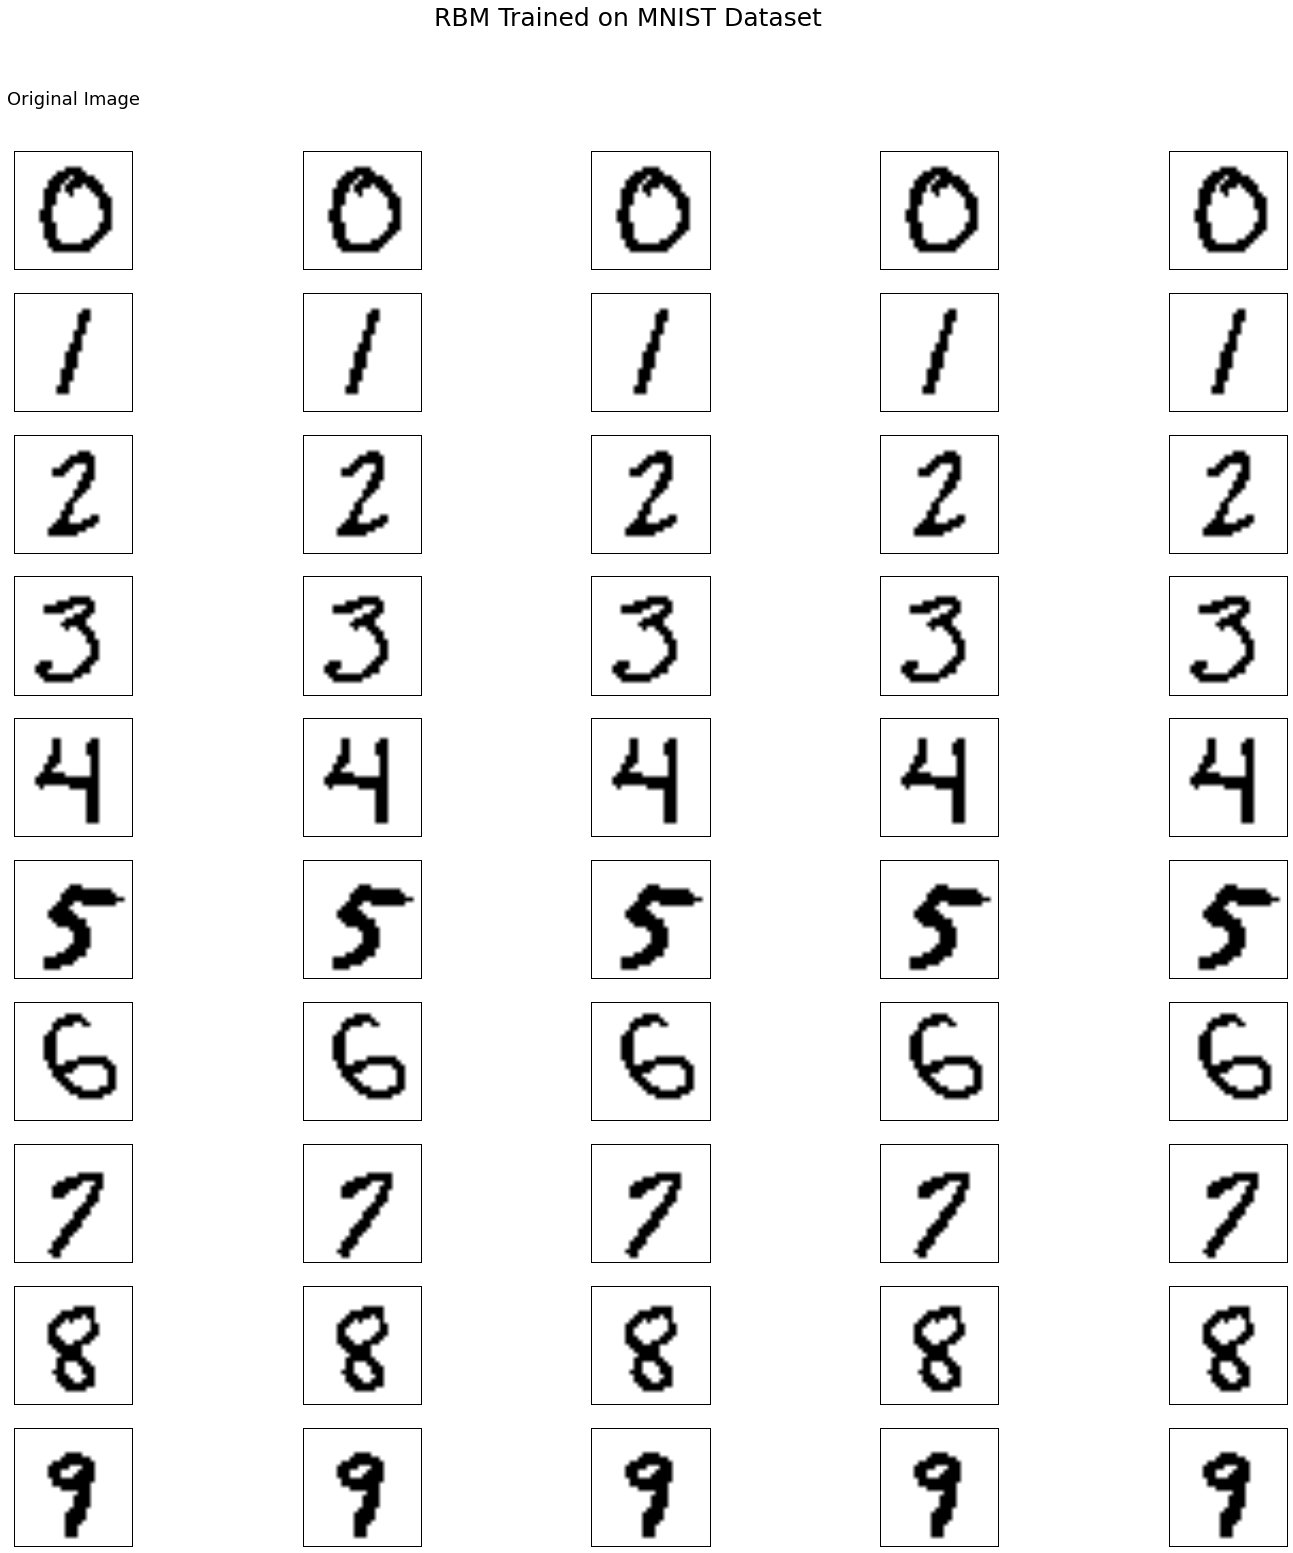

In [58]:
f = plt.subplots(10,5, figsize=(25,25))
f[1][0,0].set_title("Original Image", fontsize=18).set_position([.5, 1.35])

images = [11, 12002, 15005, 19005, 28005, 32005, 39007, 43004, 49010, 58030]

for i in xrange(0, 10):
    for j in xrange(0, 5):
        f[1][i, j].imshow(data_array[images[i]].reshape(28, 28), cmap="Greys")
        f[1][i, j].get_xaxis().set_visible(False)
        f[1][i, j].get_yaxis().set_visible(False)
    
plt.suptitle("RBM Trained on MNIST Dataset", fontsize=25)
plt.show()